# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands


Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

# Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


#### Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.



- from sklearn.metrics import r2_score
- r2_score(y_test, y_pred)



where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

# Submissions Expected:

Python Notebook: One Python notebook with the whole linear model, predictions, and evaluation.
Subjective Questions PDF: Apart from the Python notebook, you also need to answer some subjective questions related to linear regression which can be downloaded from the file below. Answer these questions and submit it as a PDF. 
Note: There are some questions in the subjective questions doc that you might not be familiar with. So you're expected to research these questions and give an appropriate answer in order to expand your learnings of this topic.

# Steps: 

1. Reading and understanding the data
2. Preparing the data for modeling (train-test split, rescaling, checking VIF, etc) 
3. Training the model 
4. Residual Analysis
5. Predictions and Evaluating on the Test dataset

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import calendar 

#Regression libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step-1: Reading and Understaind the Data

In [2]:
data = pd.read_csv("day (1).csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.shape

(730, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- 16 columns and 730 rows in the dataset 
- Categorical variables like mnth, holiday, weekday are int but need to be convereted later
- Some columns can be dropped like instant, dteday, etc

### Data Quality Checks

- Checking for null values

In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Row wise null value percentage 
round(100 * data.isnull().sum(axis=1) / len(data),2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [8]:
# Column wise null value percentage 
round(100 * data.isnull().sum() / len(data),2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

 - Checking for duplicates

In [9]:
# Dropping duplicates
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(730, 16)

No duplicates in the data

- Data cleaning and manipulation

In [11]:
# Checking out the columns present in the dataframe
data.columns.sort_values()

Index(['atemp', 'casual', 'cnt', 'dteday', 'holiday', 'hum', 'instant', 'mnth',
       'registered', 'season', 'temp', 'weathersit', 'weekday', 'windspeed',
       'workingday', 'yr'],
      dtype='object')

- Removing columns

In [12]:
data.drop(["casual", "dteday", "instant", "registered"], axis=1, 
         inplace=True)


Reasons for dropping the columns:

1. casual, registered not important as we need total bike count
2. instant is redudant as it contains record index
3. dteday because month and year are already in dataframe


In [13]:
data.shape

(730, 12)

### Data Conversion 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


 season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [15]:
# Check Different values for seasons in descending order 
data["season"].value_counts(ascending = False)

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [16]:
# Replacing the numbers according to data dict 
data["season"].replace({1: "Spring", 
                       2: "Summer", 
                       3: "Fall",
                       4: "Winter"}, inplace=True)


In [17]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 68.6+ KB


In [19]:
data["season"].value_counts(ascending = False)

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [20]:
data["mnth"].value_counts(ascending = False)

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [21]:
# Converting month to different class values of the month 
data["mnth"] = data["mnth"].apply(lambda x: calendar.month_name[x])

In [22]:
data["mnth"].value_counts(ascending=False)

mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: count, dtype: int64

In [23]:
# Checking weekday 
data["weekday"].value_counts(ascending=False)


weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [24]:
# Converting weekday to names
data["weekday"] = data["weekday"].apply(lambda x: calendar.day_name[x])

In [25]:
data["weekday"].value_counts(ascending=False)

weekday
Sunday       105
Monday       105
Tuesday      105
Wednesday    104
Friday       104
Saturday     104
Thursday     103
Name: count, dtype: int64

	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [26]:
# Converting weathersit as per data dict
data["weathersit"].value_counts(ascending=False)

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [27]:
## Replacing the weather with different values:
# good --> (1) 
# moderate --> (2)
# bad --> (3)
# severe --> (4)

In [28]:
data["weathersit"].replace({1: "Good", 2: "Moderate", 
                           3: "Bad", 4: "Severe"}).replace(inplace=True)


In [29]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Sunday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Monday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Tuesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Wednesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Thursday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [30]:
data.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Sunday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Monday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Tuesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Wednesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Thursday,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,January,0,Friday,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,January,0,Saturday,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,January,0,Sunday,0,2,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,January,0,Monday,0,1,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,January,0,Tuesday,1,1,6.184153,7.54440,48.2917,14.958889,1321


# Exploratory Data Analysis (EDA) 

### Univariate Analysis

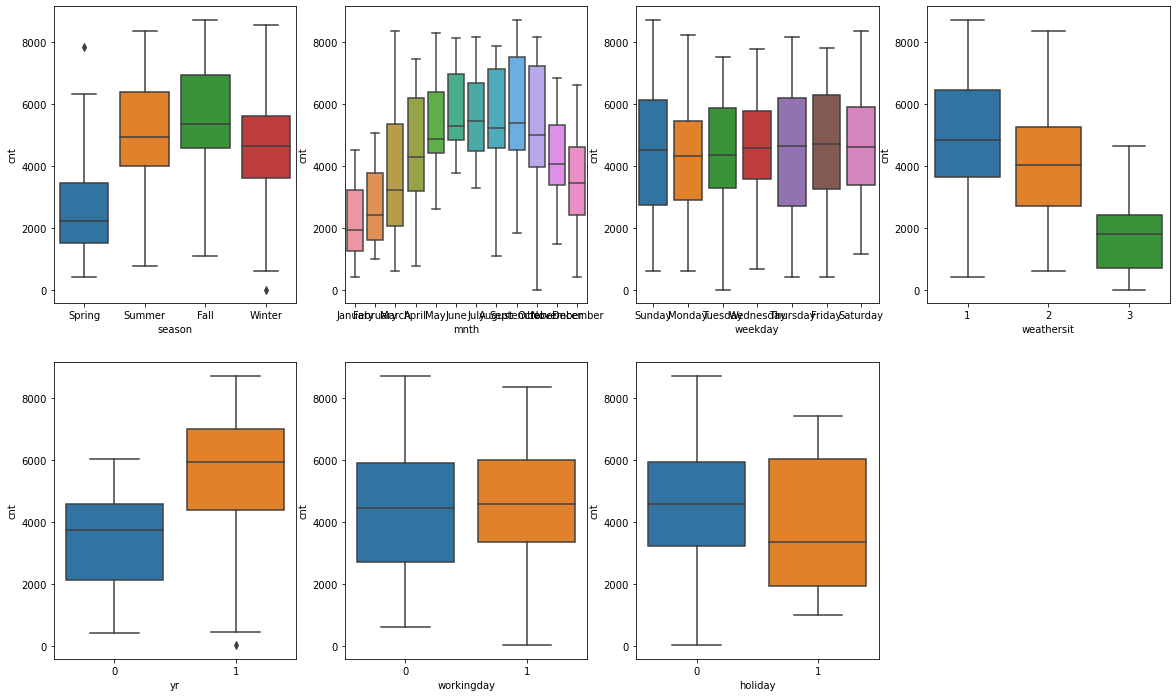

In [31]:
#visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=data)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=data)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=data)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=data)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=data)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=data)
plt.show()

<AxesSubplot:title={'center':'Windspeed vs Bike Rental Count'}, xlabel='windspeed', ylabel='Count'>

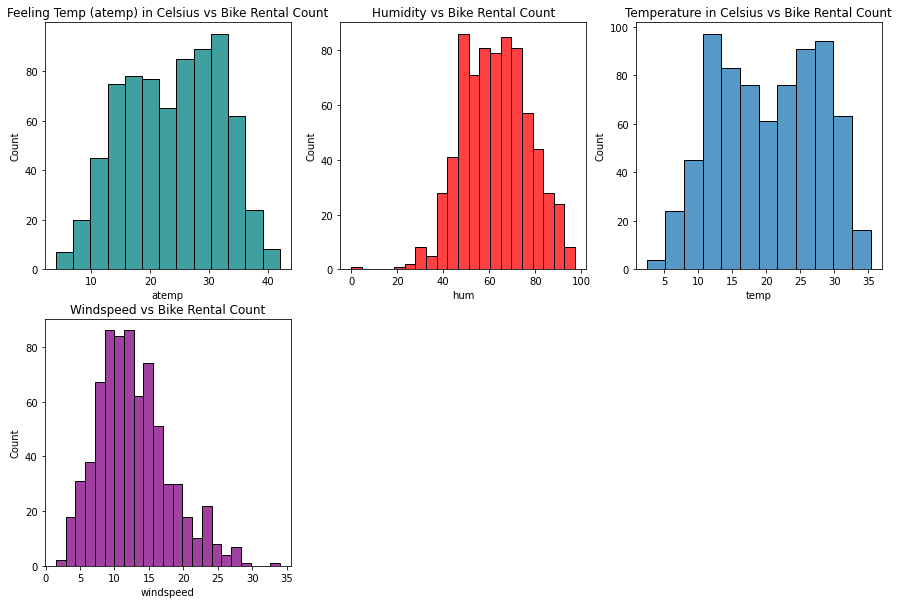

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(2, 3, 1)
plt.title("Feeling Temp (atemp) in Celsius vs Bike Rental Count")
sns.histplot(data = data["atemp"], color="teal")
plt.subplot(2, 3, 2)
plt.title("Humidity vs Bike Rental Count")
sns.histplot(data = data["hum"], color = "red")
plt.subplot(2, 3, 3)
plt.title("Temperature in Celsius vs Bike Rental Count")
sns.histplot(data = data["temp"])
plt.subplot(2, 3, 4)
plt.title("Windspeed vs Bike Rental Count")
sns.histplot(data = data["windspeed"], color = "purple")

- Average feeling temperature during bike rentals is around 22
- Humidity avg is around 60 for bike rentals
- Bikes were rented at an avg temp of 20 
- Avg windspeed for bike rentalis is 10-14  

In [33]:
data["season"].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

<AxesSubplot:xlabel='weathersit', ylabel='count'>

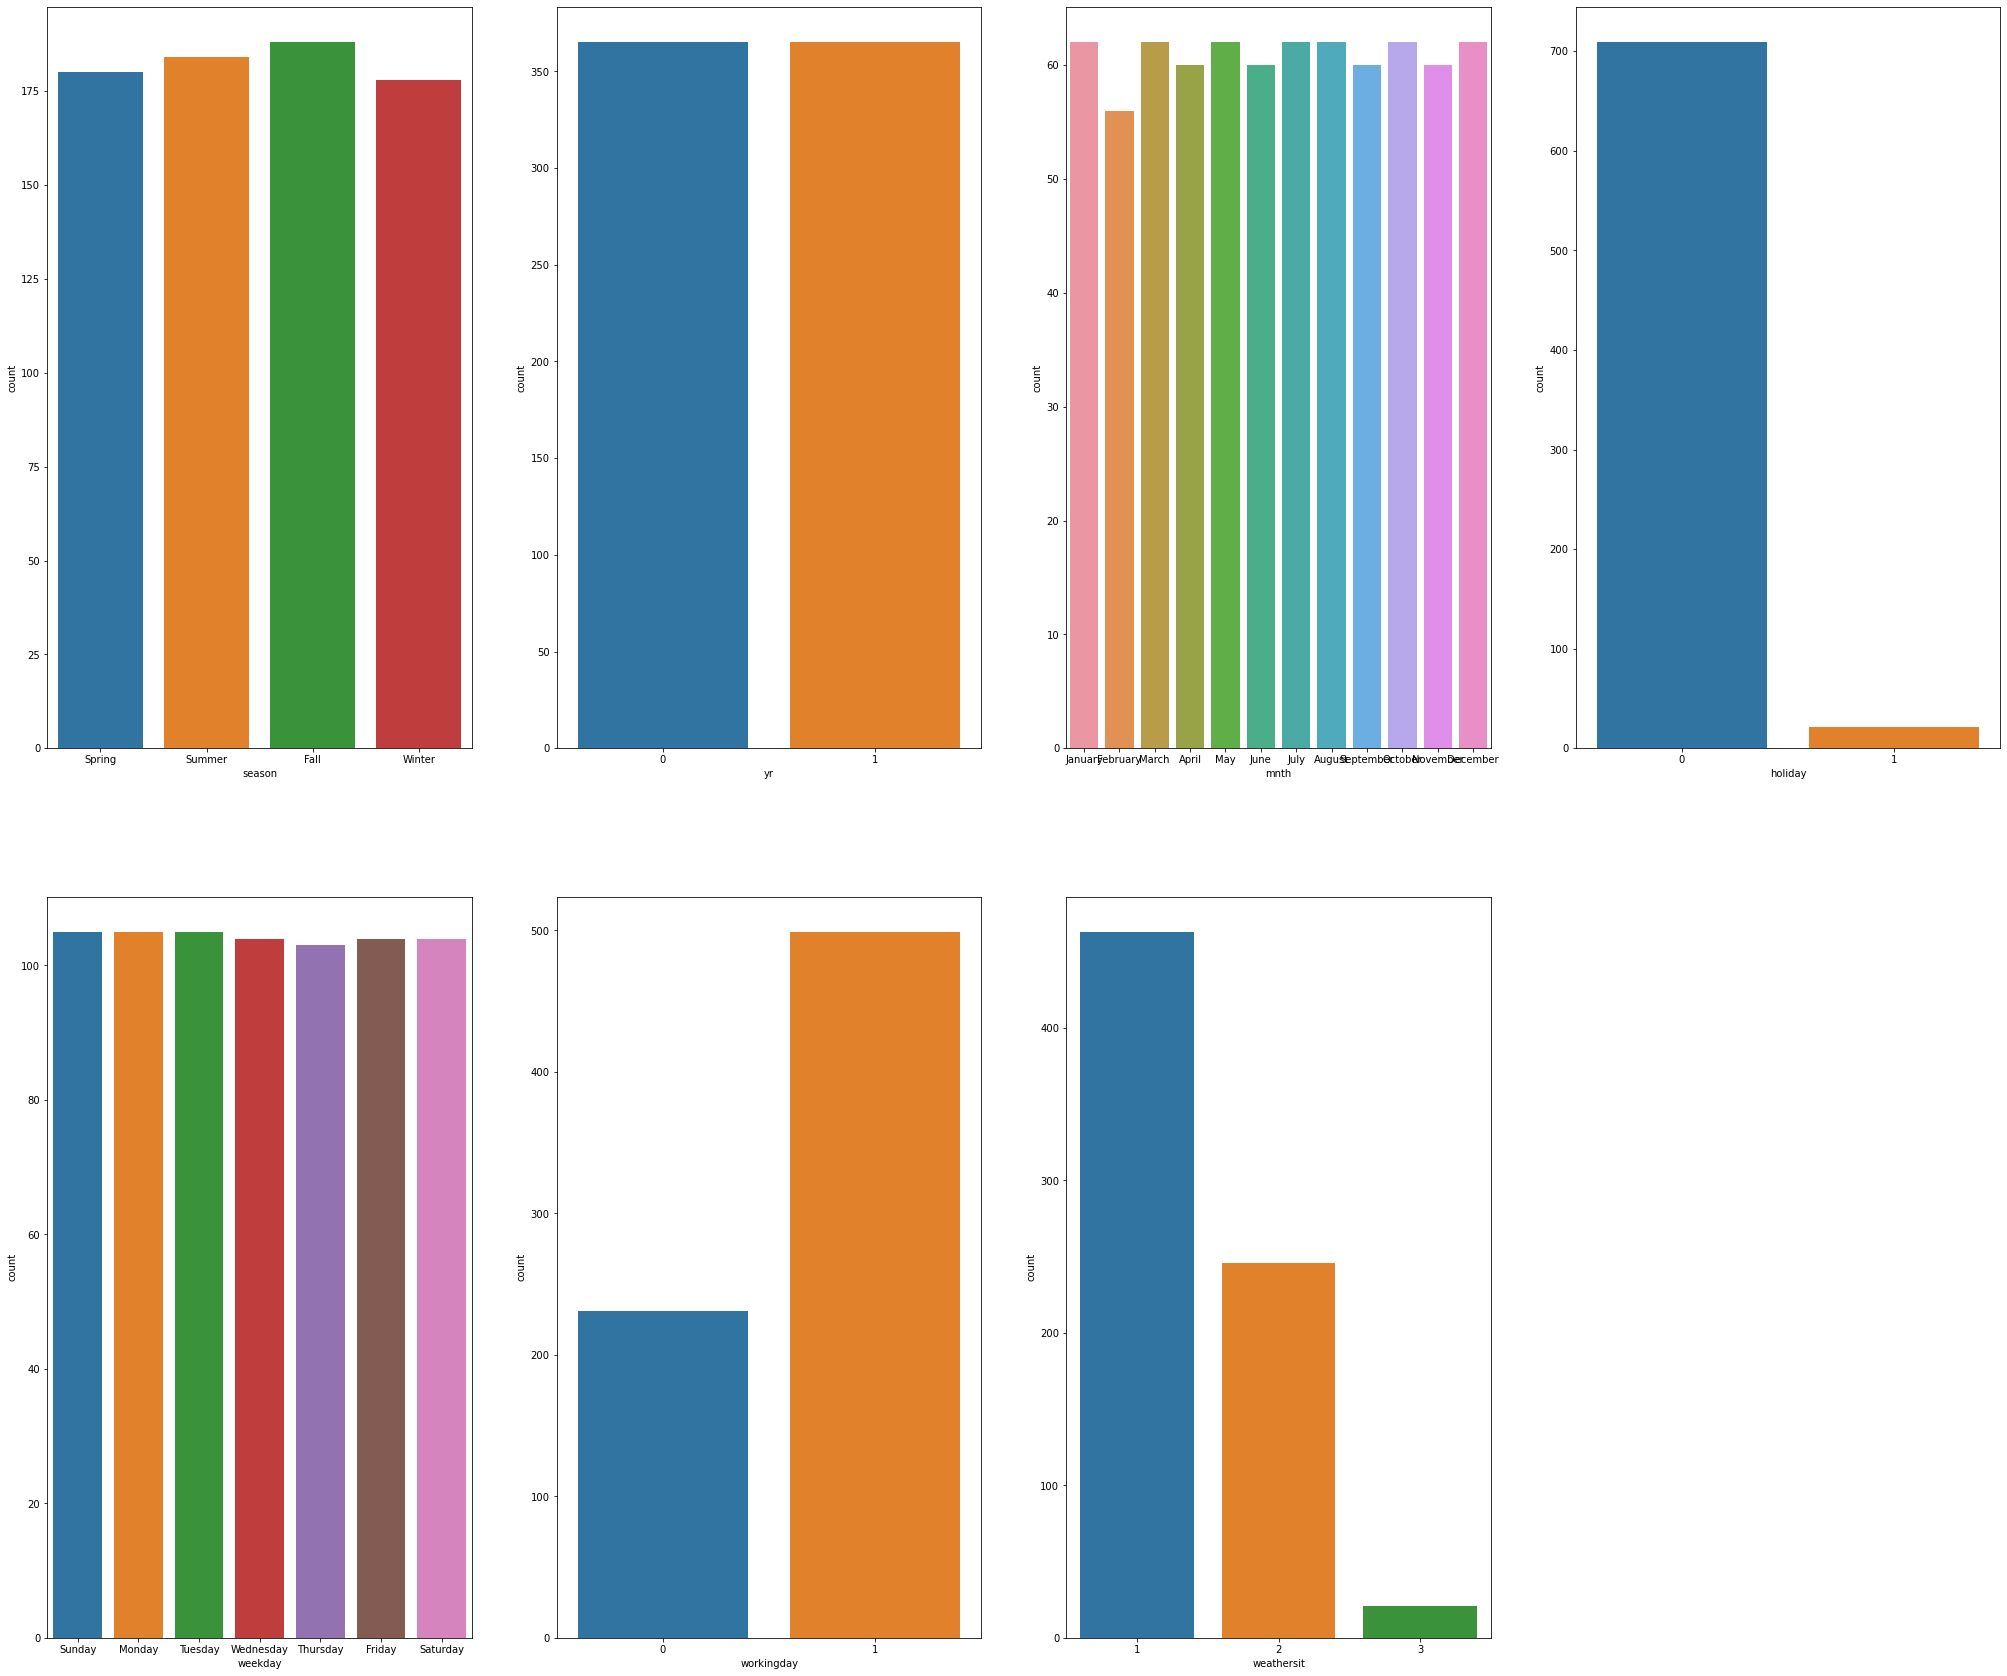

In [34]:
# Categorical Variable Analysis 
plt.figure(figsize=(35,30))
plt.subplot(2, 4, 1)
sns.countplot(x = data["season"])

plt.subplot(2, 4, 2)
sns.countplot(x = data["yr"])

plt.subplot(2, 4, 3)
sns.countplot(x = data["mnth"])

plt.subplot(2, 4, 4)
sns.countplot(x = data["holiday"])


plt.subplot(2, 4, 5)
sns.countplot(x = data["weekday"])

plt.subplot(2, 4, 6)
sns.countplot(x = data["workingday"])

plt.subplot(2, 4, 7)
sns.countplot(x = data["weathersit"])

In [35]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

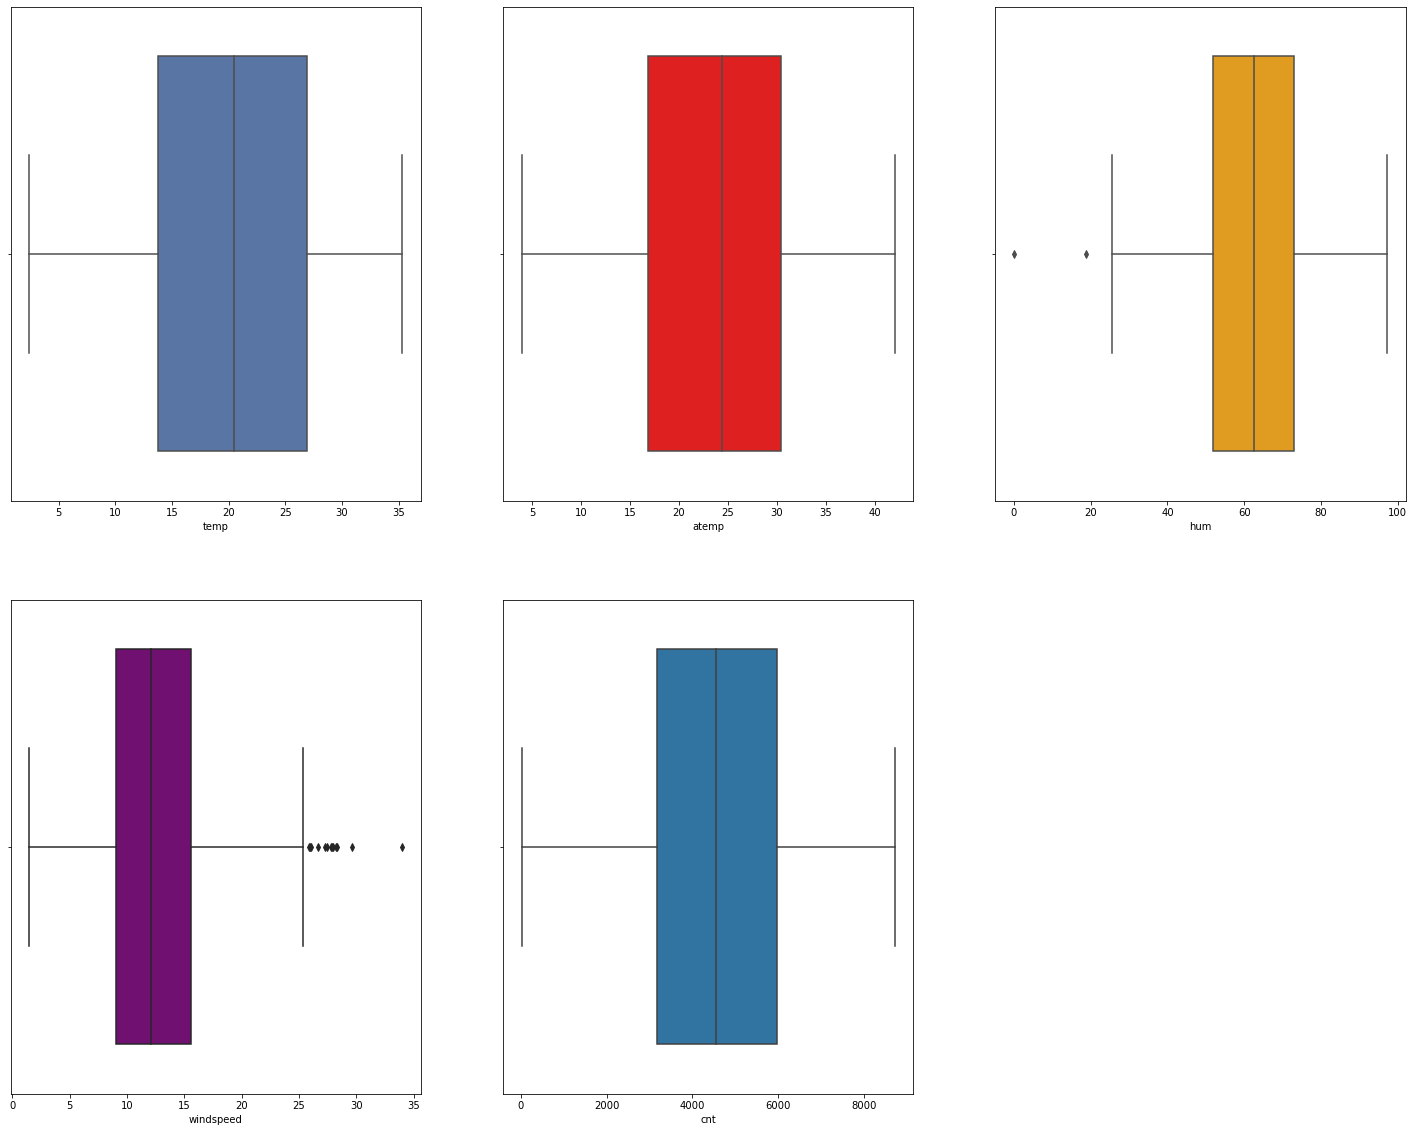

In [36]:
#visualizing the numerical varplt.figure(figsize=(10,20))iables of the dataset using boxplot 
plt.figure(figsize=(25,20))
plt.subplot(2, 3, 1)
sns.boxplot(x='temp', data=data, color='#4C72B0')
plt.subplot(2, 3, 2)
sns.boxplot(x='atemp', data=data, color = "red")
plt.subplot(2, 3, 3)
sns.boxplot(x='hum', data=data, color = "orange")
plt.subplot(2, 3, 4)
sns.boxplot(x='windspeed', data=data, color = "purple")
plt.subplot(2, 3, 5)
sns.boxplot(x='cnt', data=data)
plt.show()

<Figure size 1800x1440 with 0 Axes>

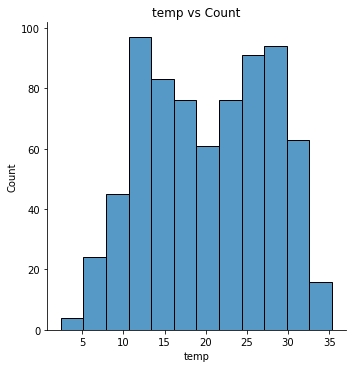

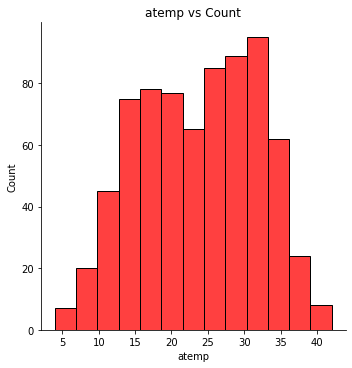

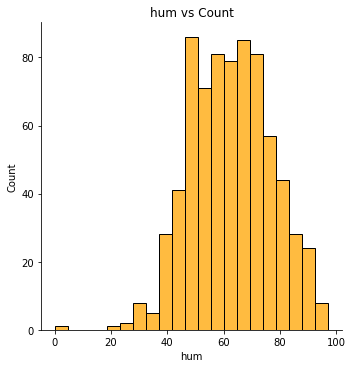

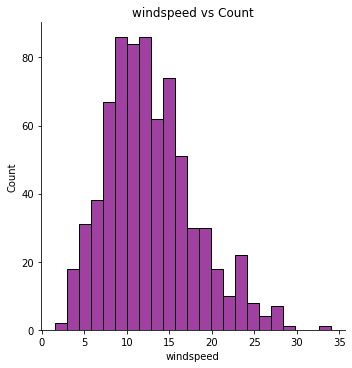

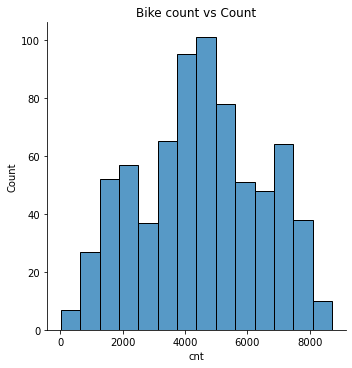

In [37]:
# Displot analysis for temp, at
plt.figure(figsize=(25,20))
sns.displot(x = "temp", data= data)
plt.title("temp vs Count")
sns.displot(x='atemp', data=data, color = "red")
plt.title("atemp vs Count")
sns.displot(x='hum', data=data, color = "orange")
plt.title("hum vs Count")
sns.displot(x='windspeed', data=data, color = "purple")
plt.title("windspeed vs Count")
sns.displot(x='cnt', data=data)
plt.title("Bike count vs Count")

plt.show()

### Bivariate Analysis

In [38]:
num_cols=["temp","atemp","hum","windspeed","cnt"]


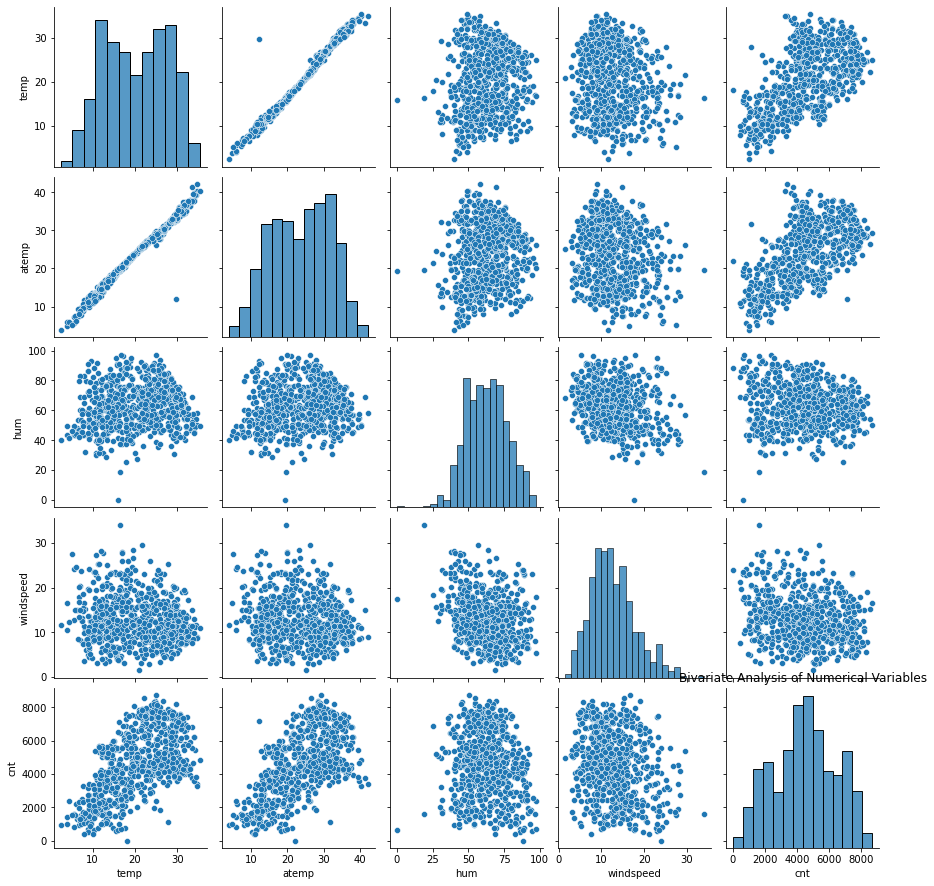

In [39]:
sns.pairplot(data[num_cols])
plt.title( 'Bivariate Analysis of Numerical Variables' )
plt.show()

1. Temperature (temp) , Feeling Temperature (atemp) vs Count (cnt): There appears to be a positive correlation with bike rental count.
2. Humidity (hum) , indspeed vs Count (cnt) : The scatter plot shows  a wide spread of points, suggesting a weak correlation or slightly negative correlation
3. Casual , Registered vs Count (cnt) : A strong positive correlation is observed 

In [40]:
continuous_variables = {
    'atemp': { 'color': 'teal' },
    'hum': { 'color': 'seagreen' },
    'temp': { 'color': 'olive' },
    'windspeed': { 'color': 'lightseagreen' }
}


In [41]:
categorical_config = {
    'season': { 'rotation': 0, 'palette': 'viridis' },
    'yr': { 'rotation': 0, 'palette': 'plasma' },
    'mnth': { 'rotation': 90, 'palette': 'cividis' },
    'holiday': { 'rotation': 0, 'palette': 'husl' },
    'weekday': { 'rotation': 90, 'palette': 'Oranges' },
    'workingday': { 'rotation': 0, 'palette': 'inferno' },
    'weathersit': { 'rotation': 0, 'palette': 'pastel' }
}


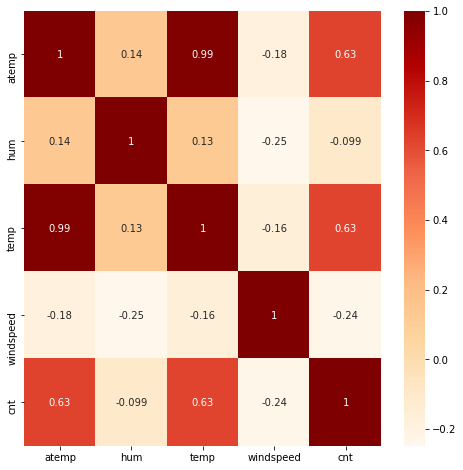

In [42]:
# Heatmap for Continuous variables 
plt.figure(figsize = (8, 8))
corr_df = data[list(continuous_variables.keys()) + ['cnt']].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'OrRd')
plt.show()

- atemp and temp exhibit a strong correlation with cnt, indicating that favorable temperatures are conducive to biking.
- atemp and temp show a strong correlation, suggesting potential redundancy. Consider employing feature elimination to assess and remove one of them.
- windspeed and hum is negatively correlated with bike rentals, indicating unfavorable biking conditions.

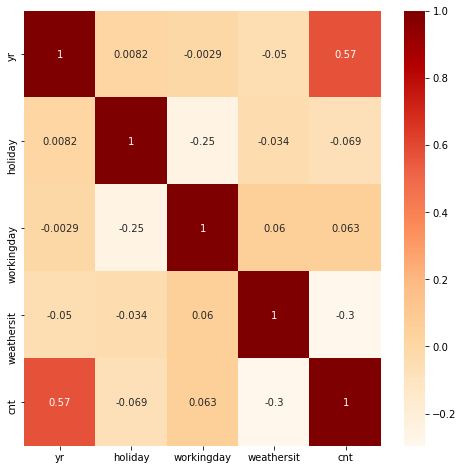

In [43]:
# Heatmap for categorical variables
plt.figure(figsize = (8, 8))
corr_df = data[list(categorical_config.keys()) + ['cnt']].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'OrRd')
plt.show()

- yr has the best correlation among all

### Multivariate analysis

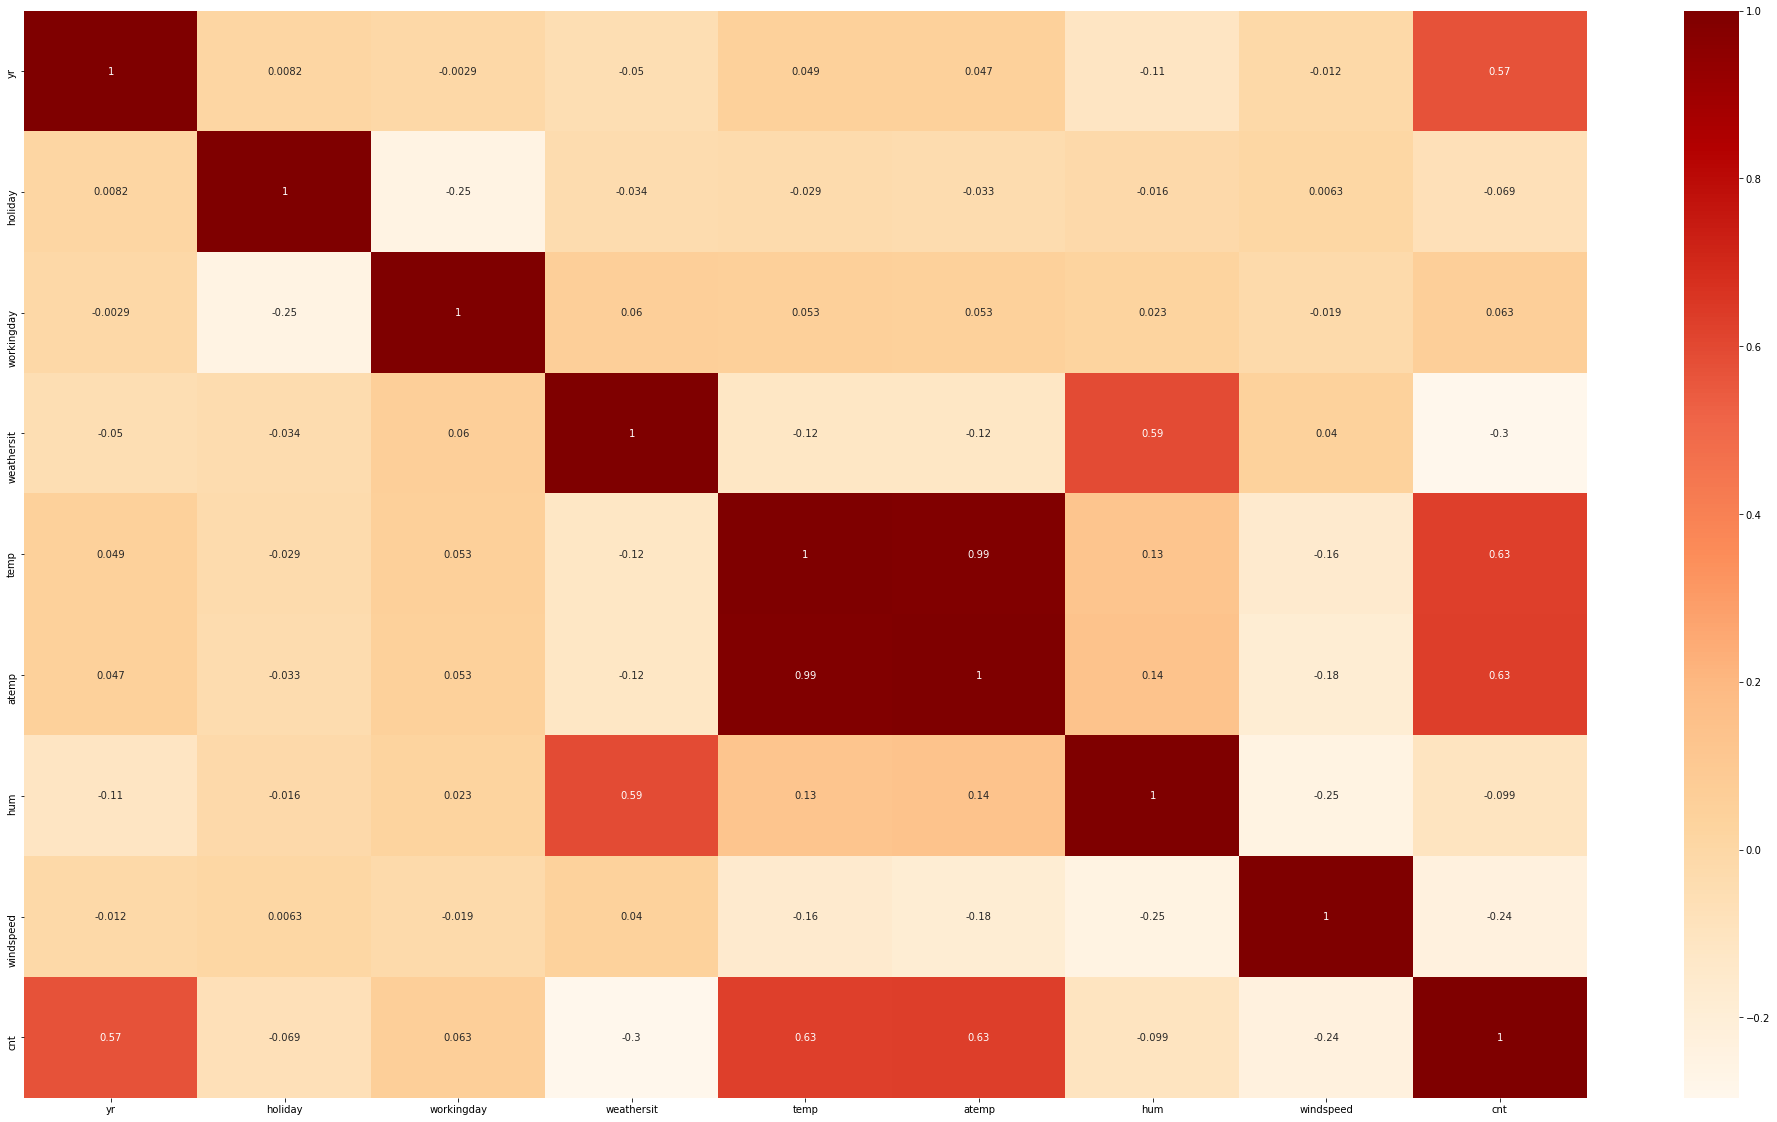

In [44]:
plt.figure(figsize = (35, 20))
corr_df = data[list(data.columns)].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'OrRd')
plt.show()

- There is a negative correlation between cnt and certain variables, specifically holiday, hum, and windspeed.
- there is a positive correlation between cnt and other variables, namely yr, workingday, temp, and atemp.
- The high correlation observed between temp and atemp further supports our initial observation that they are nearly identical.

In [45]:
cont_variables_list = ["atemp", "temp", "hum", "windspeed"]

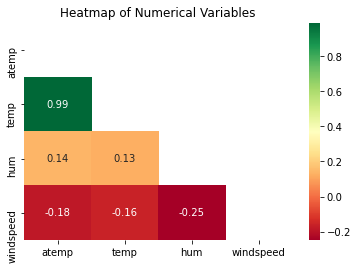

In [46]:
mask = np.triu(data[cont_variables_list].corr())
sns.heatmap(data[cont_variables_list].corr(),mask=mask,annot=True,cmap="RdYlGn")
plt.title('Heatmap of Numerical Variables')
plt.show()

1. Strong Positive Correlations:
    - Temperature (temp) with Count 
    - Feeling Temperature (atemp) with Count 
    - Registered Users (registered) with Count 
2. Moderate Positive Correlations:
    - Casual Users (casual) with Count 
3. Weak Positive Correlations:
    - Humidity  with Feeling Temperature (atemp)
    - Humidity  with Temperature (temp)
4. Weak Negative Correlations:
    - Windspeed (windspeed) with Count 
    - Humidity  with Count 
    - Windspeed (windspeed) with Feeling Temperature (atemp)
    - Windspeed (windspeed) with Temperature (temp)
5. Neutral Correlations:
    - Humidity  with Casual Users (casual)
    -Humidity  with Registered Users (registered)
    - Windspeed (windspeed) with Casual Users (casual)

#### Observations from Univariate, Bivariate and Multivariate analysis

# Step-2: Preparing the Data

In [47]:
data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [48]:
categorical_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
data[categorical_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [49]:
# Creaton of dummy variables for: season, month, weekday, weathersit
data = pd.get_dummies(data = data,dtype=int, columns = ['season', 'mnth', 'weekday', 'weathersit'],
                         drop_first = True, prefix = '', prefix_sep = '')


In [50]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', '2', '3'],
      dtype='object')

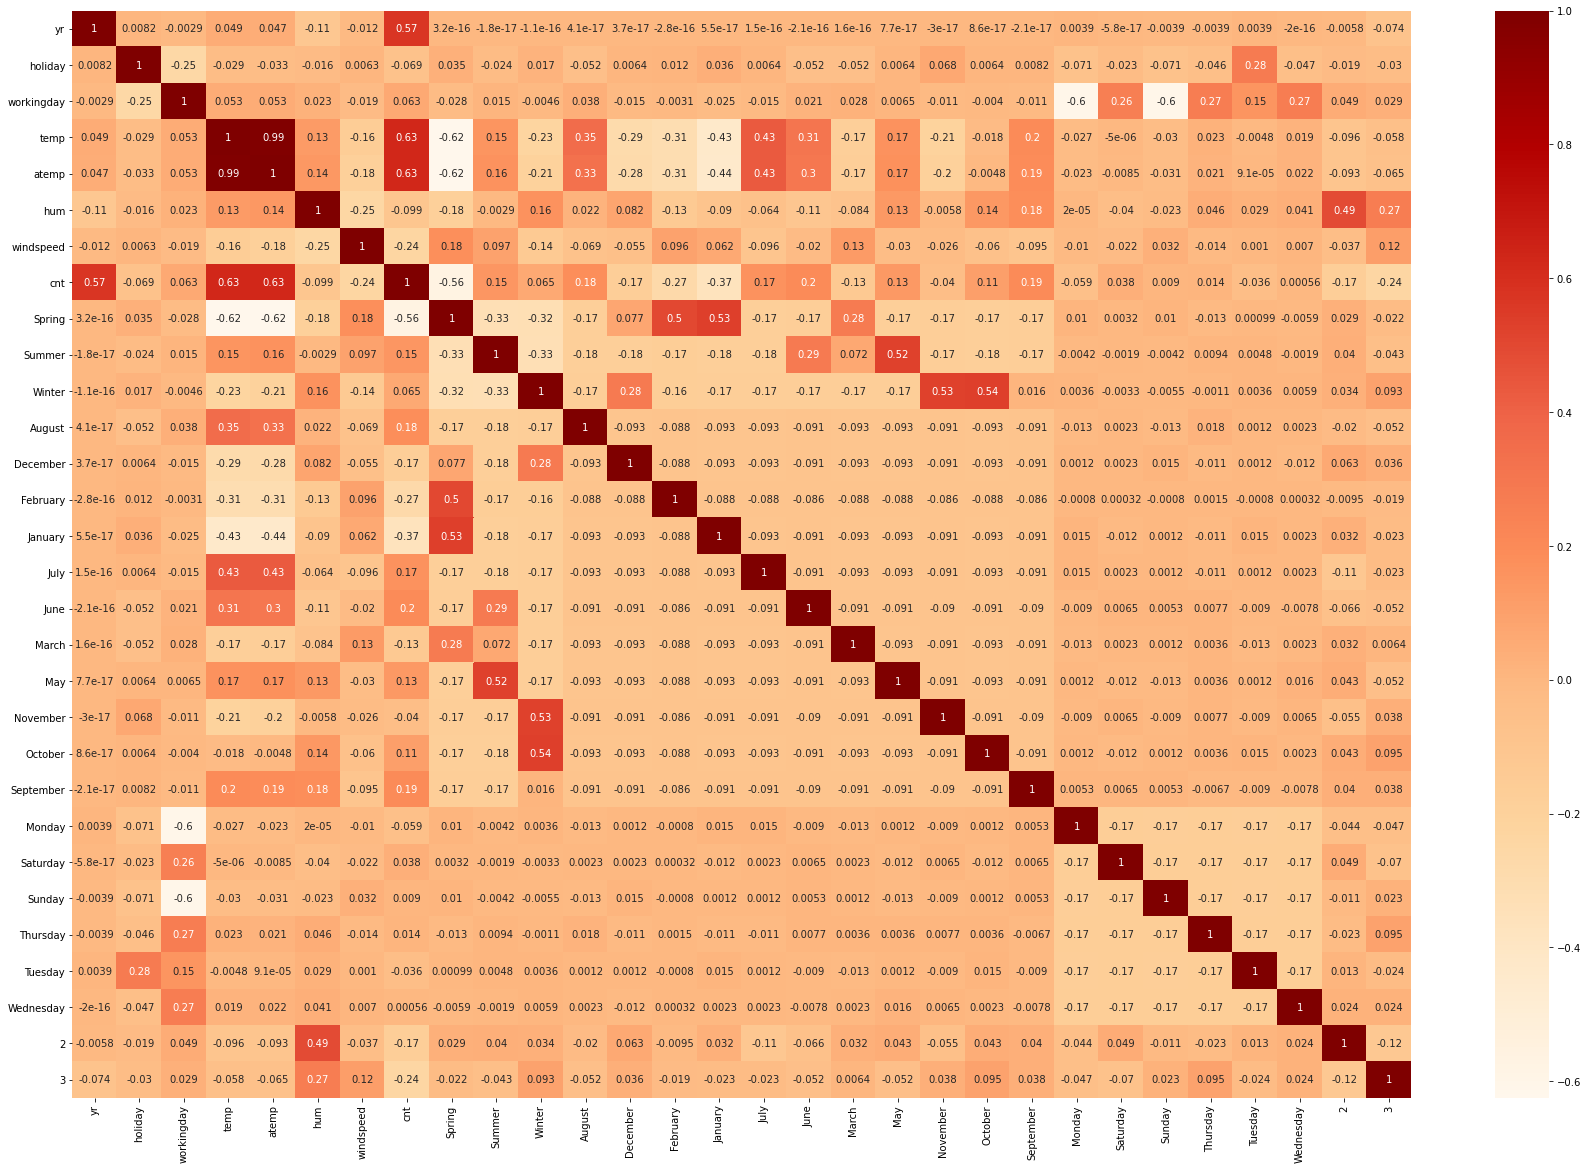

In [52]:
# Checking for correlation again 
plt.figure(figsize = (30, 20))
corr_df = data[list(data.columns)].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'OrRd')
plt.show()

In [53]:
data.shape

(730, 30)

### Model Building and Evaluation

In [54]:
X = data.drop("cnt", axis=1)
y = data["cnt"]

In [55]:
# Splitting the data into a 70% training set and a 30% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [56]:
# Checking shape and size for train and test set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(511, 29)
(511,)
(219, 29)
(219,)


In [57]:
# Inspect the head of the training set
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### Feature Scaling using Min Max Scaling

In [58]:
# 1. Instantiate an object
scaler = MinMaxScaler()

## Create a list of only numerical variables
num_vars = ["atemp", "temp", "hum", 
           "windspeed"]
# 2. Fit on data

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])


In [59]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.086106,0.080235,0.142857,0.127202,0.154599,0.158513,0.150685,0.133072,0.344423,0.029354
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.280795,0.271923,0.350270,0.333525,0.361876,0.365579,0.358092,0.339986,0.475645,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [61]:
X_train[num_vars]

,atemp,temp,hum,windspeed
653,0.501133,0.509887,0.575354,0.300794
576,0.766351,0.815169,0.725633,0.264686
426,0.438975,0.442393,0.640189,0.255342
728,0.200348,0.245101,0.498067,0.663106
482,0.391735,0.395666,0.504508,0.188475
...,...,...,...,...
578,0.824359,0.863973,0.679690,0.187140
53,0.218747,0.202618,0.435939,0.111379
350,0.223544,0.248216,0.577930,0.431816
79,0.434043,0.462664,0.759870,0.529881


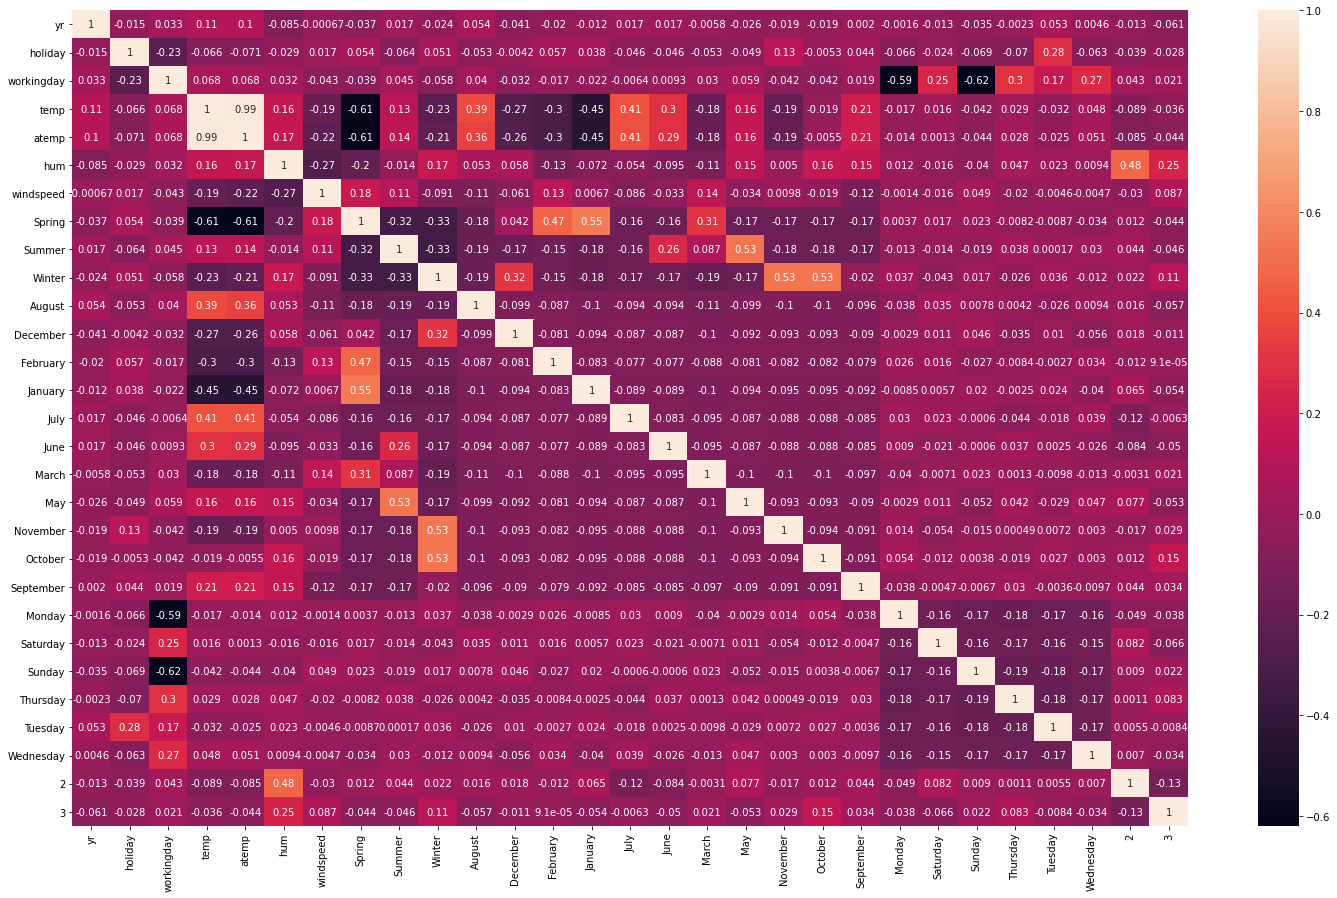

In [62]:
plt.figure(figsize = (25, 15))  #Checking if the variables are highly correlated
sns.heatmap(X_train.corr(), annot = True)
plt.show()

- November and October correlate strongly with Winter.
- May has a high correlation with Summer.
- hum is positively correlated with Moderate.

##### Selecting Features using Recursive Feature Elimination (RFE) approach
RFE, or Recursive Feature Elimination, is a feature selection technique in machine learning. It works by recursively removing the least important features based on model performance, helping to identify the most relevant features for optimal model accuracy and efficiency.



# Step-3: Training the model

In [63]:
# Calling the LinearRegression function from the SciKit Learn

lm = LinearRegression()
lm.fit(X_train, y_train)

# Running the RFE function on the Target var. & Indep. var.

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
# Checking the columns which were deemed suitable by RFE for model building
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'January', 'July', 'September', 'Sunday', '2', '3'],
      dtype='object')

In [64]:
# Creating X_train_ref with REF selecting variables

X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,January,July,September,Sunday,2,3
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0


In [65]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 8),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 15),
 ('May', False, 6),
 ('November', False, 2),
 ('October', False, 11),
 ('September', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 12),
 ('Sunday', True, 1),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 10),
 ('2', True, 1),
 ('3', True, 1)]

In [66]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    print(lm.params)
    return lm

In [67]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [68]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'January', 'July', 'September', 'Sunday', '2', '3'],
      dtype='object')

In [69]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'August', 'December', 'February', 'June', 'March', 'May',
       'November', 'October', 'Monday', 'Saturday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [70]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'January', 'July', 'September', 'Sunday', '2', '3']]


In [71]:
X_train_rfe.shape

(511, 15)

### Model-1

In [72]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'January', 'July', 'September', 'Sunday', '2', '3']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          1.50e-191
Time:                        14:07:19   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2206.7691    314.541      7.016      0.0

- All the p-values are fine as all are around a good range. 
- VIF for hum is 29.39, so in the next model I will remove hum 

### Model-2:

In [73]:
# removing hum 
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Spring',
       'Summer', 'Winter', 'January', 'July', 'September', 'Sunday', '2', '3']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     190.0
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          6.18e-189
Time:                        14:07:19   Log-Likelihood:                -4123.8
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     496   BIC:                             8341.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1522.3973    273.747      5.561      0.0

- Removing workingday as temp and temp are highly correlated

In [74]:
# removing workingday 
cols = ['yr', 'holiday', 'temp', 'windspeed', 'Spring',
       'Summer', 'Winter', 'January', 'July', 'September', 'Sunday', '2', '3']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.4
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          1.12e-186
Time:                        14:07:19   Log-Likelihood:                -4131.9
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     497   BIC:                             8351.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1858.8114    264.465      7.029      0.0

### This is a good model because temp is highly correlated and after removing the other features
### R^2: 0.838 
### Adjusted R^2: 0.834 

### Model Selection: Moving Forward with Model 6

#### Reason for Selection:

- All predictors in Model 3 have very low p-values, indicating their statistical significance.

- The VIF values for all predictors are below the permissible threshold of 5, showing minimal multicollinearity.

- p-value for F-statistic: Ensures the overall model is statistically significant.

#### Overall Model Fit:

- The F-statistic of is very high, indicating a strong model fit.

- The p-value being close to 0 confirms that the model is statistically significant.

## Interpretation of Coefficients:


- const (1858.811350): Even when all the other predictor varibles are 0, there is still an increase of ~1858.81 units) 

- yr (2044.850522): A unit increase in yr increases the bike rentals by ~2044.85

- holiday (-816.386610): A unit increase in holiday decreases the bike rentals by ~ -816.38

- temp (4122.114852): A unit increase in tempreature increases the bike rentals by ~4122.11

- windspeed (-1363.530382): A unit increase in windspeed decreases the bike rentals by ~ -1363.53

- spring (-531.807168): A unit increase in spring decreases the bike rentals by ~ -531.807

- summer (380.496569): A unit increase in summer increases the bike rentals by ~380.49

- winter (668.806504): A unit increase in winter increases the bike rentals by ~668.806

- january (-333.645419): A unit increase in january decreases the bike rentals by ~ -333.64

- july (-443.581273): A unit increase in july decreases the bike rentals by ~ -443.58

- september (660.234801): A unit increase in semptember increases the bike rentals by ~660.23

- sunday (172.032568): A unit increase in sunday increases the bike rentals by ~172.032

- 2 (-694.085365): A unit increase in moderate weather decreases the bike rentals by ~ -694.085

- 3 (-2491.068086): A unit increase in bad weather decreases the bike rentals by ~ -2491.068


### NOTE: 

- {1: Good, 2: Moderate, 3: Bad, 4: Severe}  --> Weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



In [75]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [76]:
lr = build_model_sk(X_train[cols], y_train)
print(lr.intercept_, lr.coef_)

1858.8113500006311 [ 2044.85052186  -816.38660994  4122.11485231 -1363.530382
  -531.80716843   380.49656881   668.80650371  -333.6454192
  -443.58127275   660.23480118   172.03256827  -694.08536517
 -2491.06808591]


# Residual Analysis of training data and validation

In [77]:
y_train_pred = lr.predict(X_train[cols])

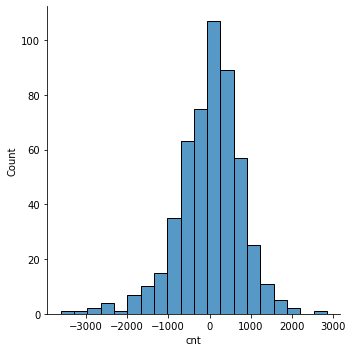

In [83]:
# Plotting a histogram of error terms

res = y_train - y_train_pred 

sns.displot((res), bins = 20)


**Insights**: From the above histogram, we could see that the Residuals are normally distributed, which proves that assumption for Linear Regression is valid.

#### Homoscedasticity


- Assumption of homoscedasticity refers to the condition where the variance of the error terms is constant across all levels of the independent variable. When this assumption is violated, the error terms are said to be heteroscedastic, which can have several implications for the model's performance and inference.
Detecting heteroscedasticity is crucial, doing it through residual plot

Text(0.5, 1.0, 'Residual Plot')

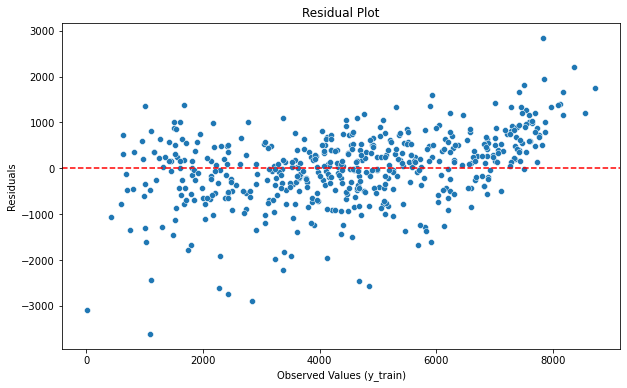

In [84]:
plt.figure(figsize=(10, 6))
y_train_pred = lr.predict(X_train[cols])
residual = y_train - y_train_pred 
sns.scatterplot(x=y_train, y=residual)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Observed Values (y_train)')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')

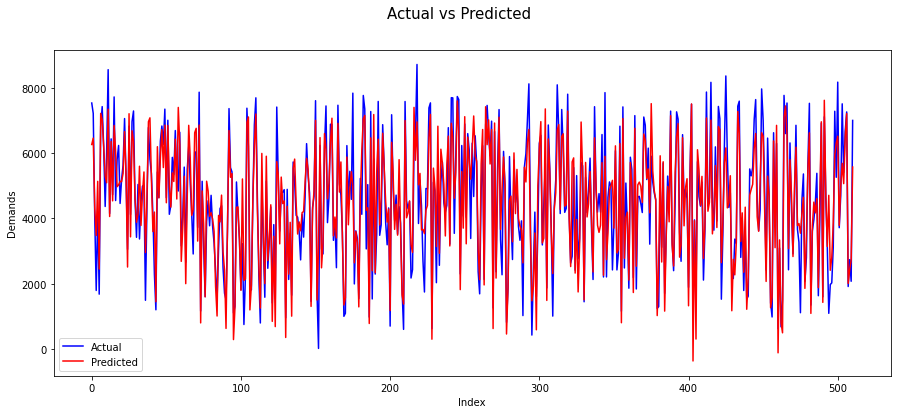

In [85]:
# Actual vs Predicted
import numpy as np
import matplotlib.pyplot as plt

# Convert y_train and y_train_pred to NumPy arrays if they are not already

y_train = np.array(y_train)
y_train_pred = np.array(y_train_pred)

# Generate the index for plotting
c = np.arange(len(X_train))  # Create a range based on the length of X_train

# Plot Actual vs Predicted

plt.figure(figsize=(15, 6))  # Set figure size
plt.plot(c, y_train, color="blue", label="Actual")  # Actual values
plt.plot(c, y_train_pred, color="red", label="Predicted")  # Predicted values
plt.suptitle('Actual vs Predicted', fontsize=15)  # Add title
plt.xlabel('Index')  # X-axis label
plt.ylabel('Demands')  # Y-axis label
plt.legend()  # Add a legend to distinguish between actual and predicted
plt.show()


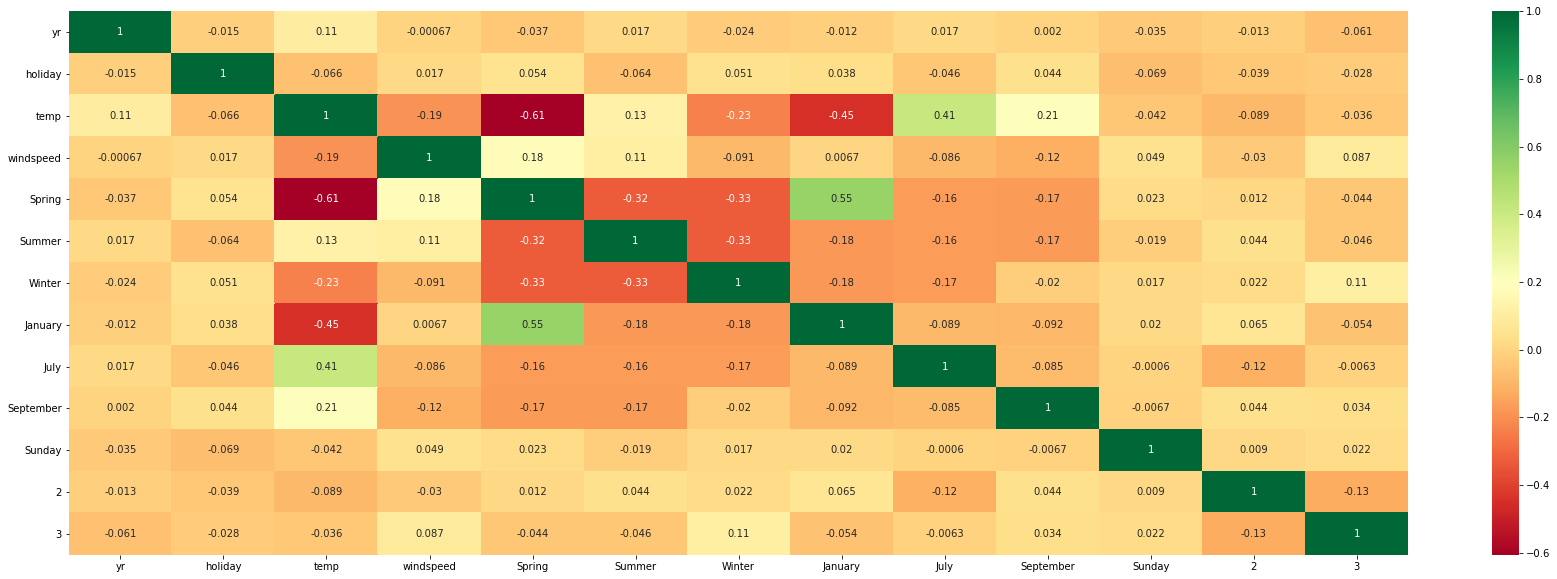

In [86]:
plt.figure(figsize=(30,10))
sns.heatmap(X_train[cols].corr(),annot = True, cmap="RdYlGn")
plt.show()

# Step-5: Model Predictions

In [87]:
# R squared value of train predictors
r2_score(y_train, y_train_pred) 


0.8377612105324185

In [88]:
# Prediction of values in test data set

# Scale variables in X_test 
num_vars = ["atemp", "temp", "hum", 
           "windspeed"]

# Test data needs to be transformed, not fit()
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [89]:
cols_final = ['yr', 'holiday', 'temp', 'windspeed', 'Spring',
       'Summer', 'Winter', 'January', 'July', 'September', 'Sunday', '2', '3']

# Predicting test data values
y_test_pred = lr.predict(X_test[cols_final])

In [90]:
# R-squared value for test prediction
r2_score(y_test,y_test_pred)

0.8027277678196978

## Evaluating the model

In [93]:
y_pred = y_test_pred

## R^2 value for TEST

In [95]:
r2 = r2_score(y_test,y_pred)
r2

0.8027277678196978

## Adjusted R^2 Value for TEST

In [96]:
r2 = 0.802

# n--> number of rows in X
n = X_test.shape[0]

# p --> Number ofp redictors
p = X_test.shape[1]

adj_r2 = 1-(1-r2)*(n-1) / (n-p-1)
adj_r2

0.7716190476190476

## Visualizing the fit on test data

Text(0, 0.5, 'y_pred')

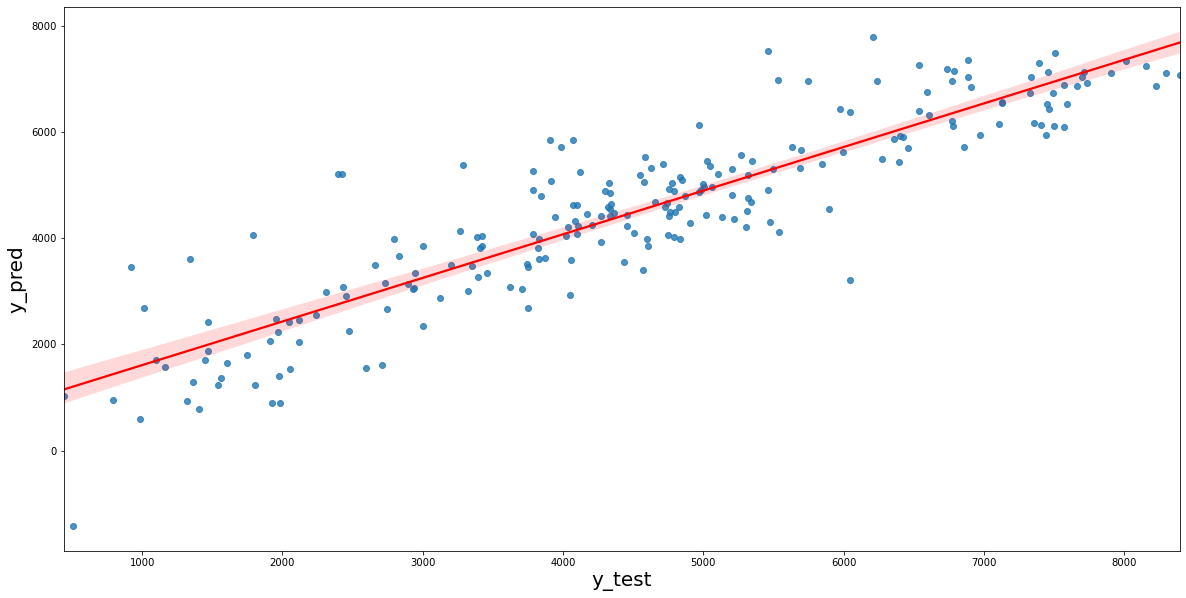

In [104]:
plt.figure(figsize=(20,10))
sns.regplot(x=y_test, y = y_pred, line_kws = {"color": "red"})
plt.xlabel("y_test", fontsize=20)
plt.ylabel("y_pred", fontsize=20)

# THE EQUATION OF THE BEST FITTED MODEL:


## cnt = 

            1858.811 + (yr * 2044.850) - (holiday * 816.386) + (temp * 4122.114) -

            (windspeed * 1363.530) - (spring * 531.807) + (summer * 380.496) + 
            
            (winter * 668.806) - (january * 333.645) - (july * 443.581) + 
            
            (september * 660.234) + (sunday * 172.032) - (2 * 694.085) - 
            
            (3 * 2491.068) 
            


## NOTE: 
- {1: Good, 2: Moderate, 3: Bad, 4: Severe}  --> Weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


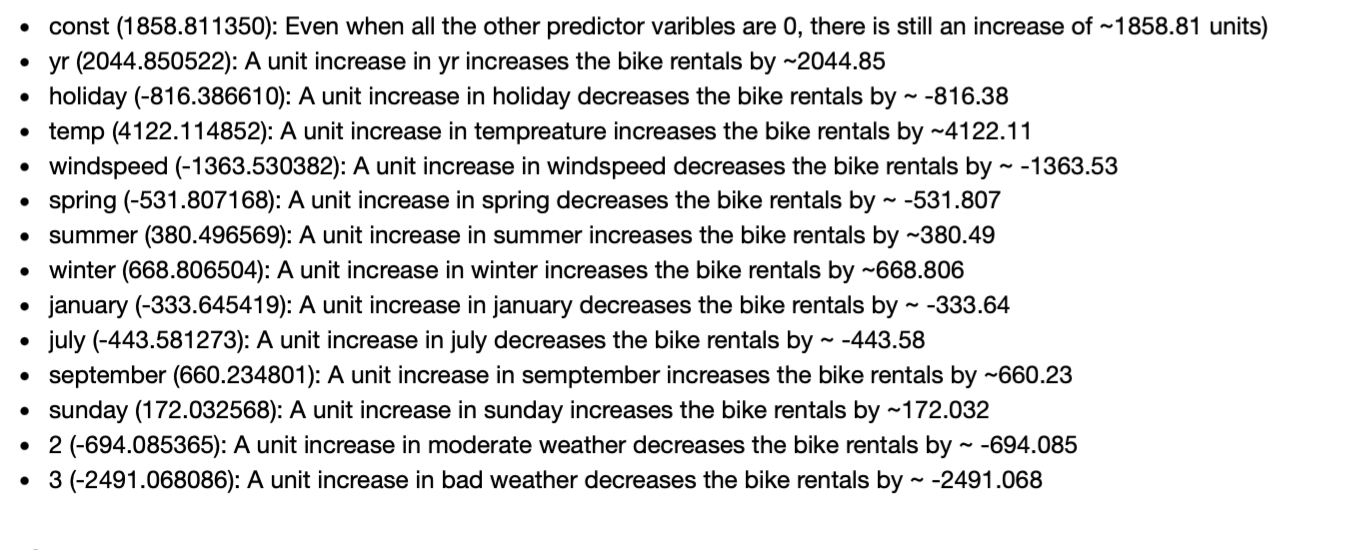

# Conclusion:


The Key Features used in predicting the target variable **cnt** (bike count) are: 

1. yr


2. holiday 


3. temp 


4. windspeed


5. spring


6. summer


7. winter


8. january


9. july


10. september


11. sunday 


12. 2 (Moderate weather => Mist + cloudy, mist + broken clouds, mist + few clouds)


13. 3 (Bad weather => Heavy rain + ice pallets + thunderstrom + mist, snow + fog) 

# Key insights from the model 

1. **temperature (tmp)**: 
    - A unit increase in temp results in a 4122.11 increase in bike books 
    - Based on this we can conclude that as the warmer the temperature, the number of bike books will increase thus there is a postive and strong correlation between bike usage and temperature. 
    

2. **year (tr)**: 
    - A unit increase in yr leads to a 2044.850 in bike books.
    - Based on this we can conclude that as the trend for bike rentals becomes more in-demand so does the increasing popularity and customer demand. 
    

3. **Semptember**:
    - During september is when the bike bookings have a very strong positive correlation.
    - This can be due to various reasons but one being an increased popularity. 
    
4. **3 (Bad weather)**:
    - A unit increase in heavy rain + ice pallets + thunderstorm + mist, snow + fog leads to -2491.068 decrease in bike bookings. 
    - We can say that in the winter times not many people would rend bikes due to bad weather conditions.
 

# Overall Analysis

Based on the analysis I can conclude that bike demand is primarly influenced by: 

1. ***Positive Factors*** such as warmer temperatures around summer time, september month and a positive trend that drives the demand for shared bike bookings. 

2. ***Negative Factors*** such as bad weather conditions such as heavy rain/thunderstorms/snow and holidays especially during the winter time decreases the number of bookings. 